# Sobre las mediciones de pobreza 

La medida de pobreza convencionalmente utilizada está basada en el concepto de pobreza como consumo insuficiente de bienes y servicios. Generalmente, se utiliza información sobre ingresos para establecer cuánto consume una persona u hogar, y se compara su consumo con una línea de pobreza que se actualiza anualmente. Desde esta aproximación, los pobres son personas que no tienen ingreso suficiente y que, por lo tanto, se encuentran por debajo de un umbral mínimo 

 de bienestar. Una visión más amplia de bienestar y de la condición de pobreza se centra en lo que el individuo puede hacer y lo que puede ser. Esta aproximación tiene en cuenta el ingreso, pero va más allá de la falta de recursos, ya que incluye las capacidades humanas, es decir, las habilidades y capacidades de las personas. 
 Las medidas no monetarias de pobreza tienen en cuenta variables como la educación, la salud y el acceso a vivienda, entre otras, para determinar si una persona es pobre. 

En la actualidad, la pobreza se mide por medio de un modelo top-down en el que “expertos” y tomadores de decisión determinan cuáles son las dimensiones más importantes en la calidad de vida de las personas, cuántas privaciones debe experimentar alguien para ser considerado pobre y qué importancia asignar a cada dimensión en los índices. Las mediciones de pobreza no involucran mecanismos de participación ciudadana para su construcción, y se alejan de las valoraciones, priorizaciones e interpretaciones que las personas en condición de pobreza hacen sobre su condición. Para combatir la pobreza es necesario 

Dentro de sus objetivos, las mediciones de pobreza siguen las condiciones socioeconómicas de la población y sirven como herramienta para el desarrollo de política social. El Índice de Pobreza Multidimensional es limitado a la hora de identificar realidades locales de pobreza.


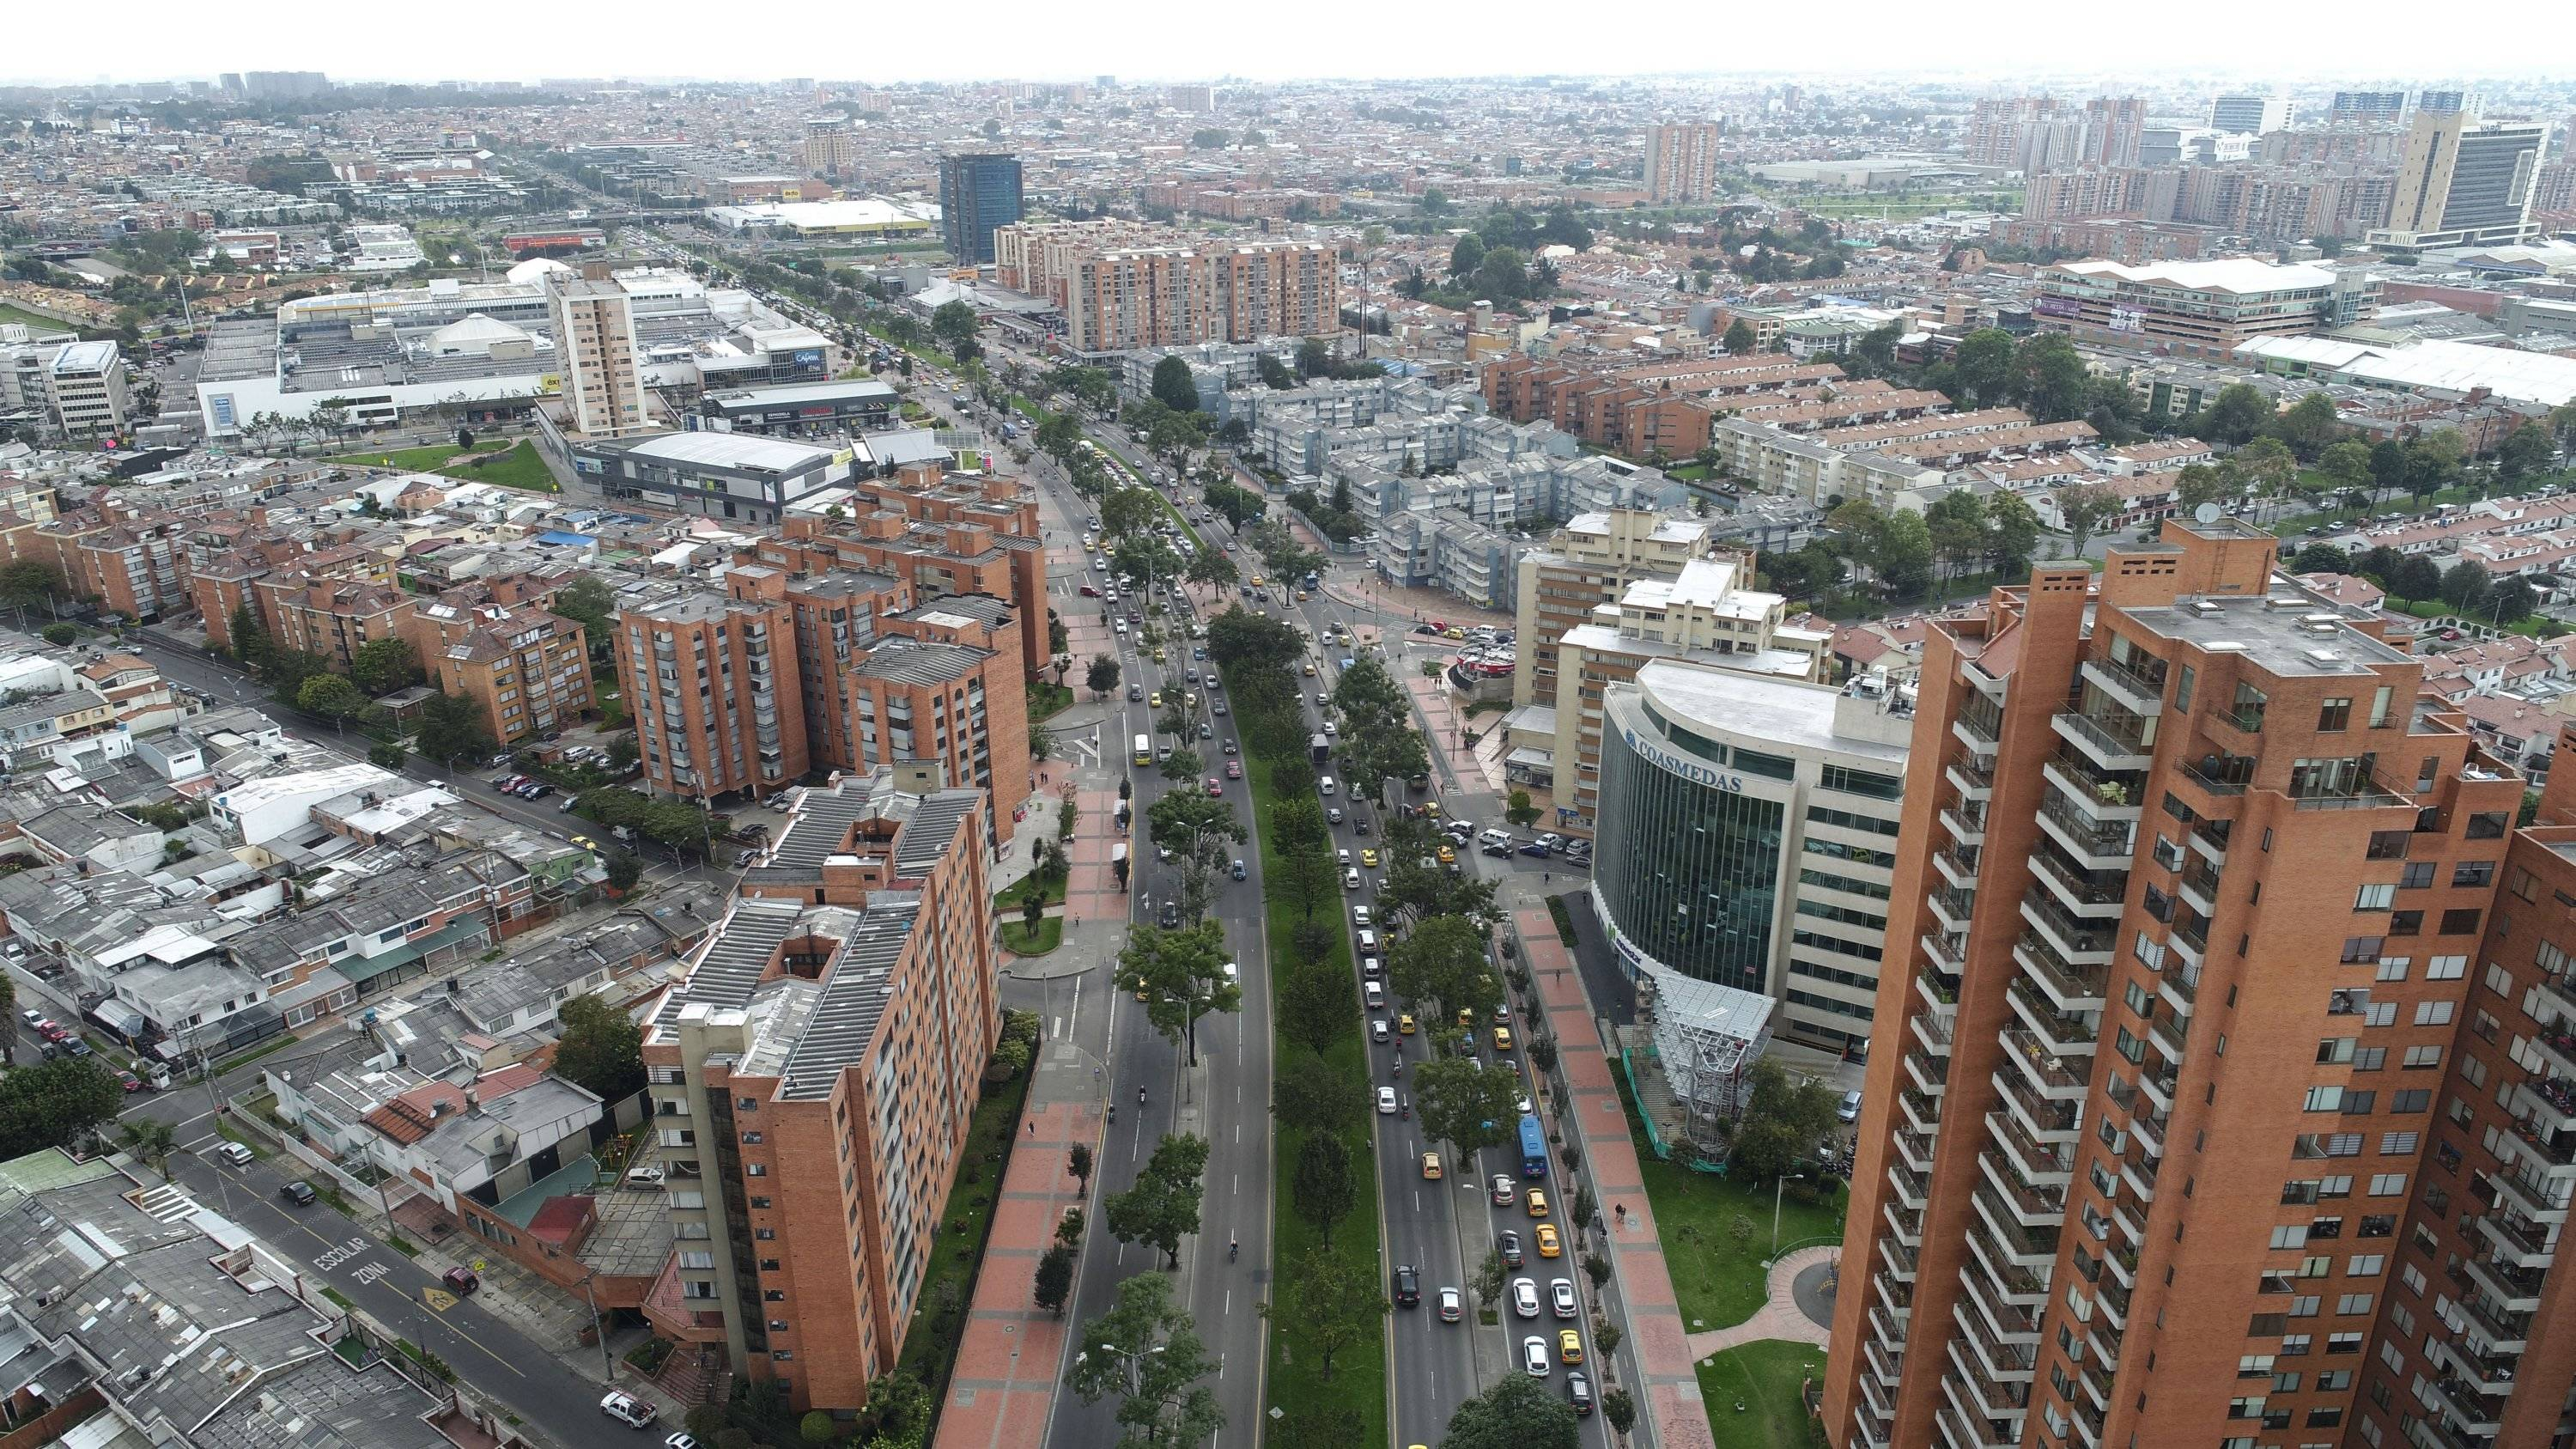

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leyendo la data desde la carpeta origen 

In [3]:
os.chdir(r'C:\Users\Fps\Documents\Proyecto Analisis de Caso')
os.listdir()

['diccionarios_em2017_0 (1).xlsx',
 'Proyecto_analisis_caso.py',
 'variables_adicionales_hogar_v3.txt',
 'variables_adicionales_personas_v2.txt',
 'viviendas_2017_v2_03092018.txt',
 '~$diccionarios_em2017_0 (1).xlsx']

In [4]:
#Abriendo las bases de dats 

In [5]:
emb=pd.read_csv('variables_adicionales_hogar_v3.txt', sep = ";")

viv=pd.read_table('viviendas_2017_v2_03092018.txt', sep = ",",
                  encoding='latin1')

per = pd.read_table('variables_adicionales_personas_v2.txt', sep = ",")

In [6]:
#Evaluando duplicados y removiendolos 

In [7]:
emb['DIRECTORIO_HOG'].duplicated().value_counts()
viv['DIRECTORIO'].duplicated().value_counts()
per['directorio_per'].duplicated().value_counts()

False    319952
Name: directorio_per, dtype: int64

In [8]:
#No hay hogares duplicados, ni directorios ni personas repetidas en estas tres bases de datos

In [9]:
##Filtrando la base de datos de vivienda con las variables deseadas, segun nuestras hipotesis preliminares

In [10]:
viv_1=viv[['DIRECTORIO', 'DPTOMPIO','LOCALIDAD_TEX', 'CLASE',
               'COD_UPZ', 'ESTRATO_TEX','ESTRATO', 'FEX_P', 'NVCBP11A', 'NVCBP11AA', 'NVCBP11C','NVCBP14B', 'NVCBP14E', 'NVCBP14G','NVCBP14I']]

In [11]:
#Peganda bases de vivienda con variables deseadas y base de datos hogares

In [12]:
emb_1= emb.merge(viv_1, on = 'DIRECTORIO', how='inner')
emb_1.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
0,101000,16.604442,1010001,10100011,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,2.0,1,2,2,2,2
1,101001,26.046357,1010011,10100111,6.79,6.11,7.14,6.62,6.99,6.67,...,58.San Cristobal Norte,1100158,24.703971,1,3.0,1,2,2,2,2
2,101002,13.840826,1010021,10100211,6.79,6.11,7.14,6.62,6.99,6.67,...,70.Toberin,1100170,14.022222,1,3.0,1,2,2,2,2
3,101003,7.011111,1010031,10100311,6.79,6.11,7.14,6.62,6.99,6.67,...,70.Toberin,1100170,14.022222,1,3.0,1,2,2,2,1
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1


In [13]:
#Constantando que no hayan hogares repetidos con esta manera de pegar los datos. 

In [14]:
emb_1['DIRECTORIO_HOG'].duplicated().value_counts()

False    109111
Name: DIRECTORIO_HOG, dtype: int64

In [15]:
#Finalmente se observa que de los 109111 registros ninguno quedo con hogar repetido. 

In [16]:
#Filtrar solo Bogota, con las siguientes caracteristicas DPTOMPIO == 11001 (Bogota), y CLASE == 1 (Urbana) 

In [17]:
condicion_bog_urb = emb_1.DPTOMPIO.isin([11001]) & emb_1.CLASE.isin([1])
condicion_bog_urb.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [18]:
db_bog_urb =emb_1.loc[condicion_bog_urb,]
db_bog_urb.DPTOMPIO.value_counts()
db_bog_urb['DPTOMPIO'].duplicated().value_counts()

True     74639
False        1
Name: DPTOMPIO, dtype: int64

#Una vez filtrada la data, se comprueba que solamente estemos trabajando con datos de Bogota Urbana segun las caracteristicas anteriormente mencionadas. 


#Filtrando por los estratos de interes 4,5 y 6 (Estratos medios-atos de Bogota)

In [19]:
condicion_estratos = db_bog_urb.ESTRATO_VIV.isin([4,5,6])
db_bog_estratos = db_bog_urb.loc[condicion_estratos,]
db_bog_estratos.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
5,101005,33.398706,1010051,10100511,6.79,6.11,7.14,6.62,6.99,6.67,...,90. CHAPINERO: Chico Lago + Refugio,1100190,44.953095,1,6.0,1,2,2,2,2
20,101019,60.925008,1010191,10101911,4.33,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
23,101023,21.122395,1010231,10102311,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2


In [20]:
#Calculando el ingreso por estrato - sin tener en cuenta los factores de expansion 
Ingresos_estratos =db_bog_estratos.groupby('ESTRATO_VIV', as_index = False).agg({'INGRESOS_HOG':'mean'})
Ingresos_estratos.head()

,ESTRATO_VIV,INGRESOS_HOG
0,4,6.736699e+06
1,5,9.423332e+06
2,6,1.172631e+07


##Calculando el ingreso por estrato - teniendo en cuenta los factores de expansion 

In [21]:
#definicion Formula 
def total_est(df, y_i, w_i):
    d=df[y_i]
    w=df[w_i]
    return(sum(d*w)/sum(w))

In [22]:
#Calculando con expansion 
db_bog_estratos.groupby('ESTRATO_VIV',as_index = False).apply(total_est, 'INGRESOS_HOG', 'FEX_C') 

0    7.161870e+06
1    9.676284e+06
2    1.230490e+07
dtype: float64

In [23]:
#Creando una base de datos para comparar ambos ingresos
Ingresos_estratos['INGRESOS_HOG_EXP'] =[7.161870e+06,9.676284e+06,1.230490e+07]

#Grafico de los ingresos

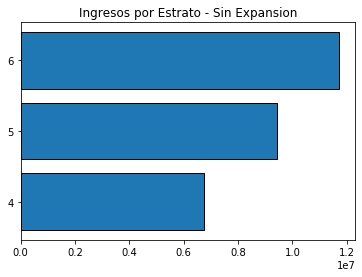

In [24]:
plt.barh(range(3), Ingresos_estratos['INGRESOS_HOG'], edgecolor='black')
plt.yticks(range(3), Ingresos_estratos['ESTRATO_VIV'], rotation=0)
plt.title("Ingresos por Estrato - Sin Expansion")
plt.show()

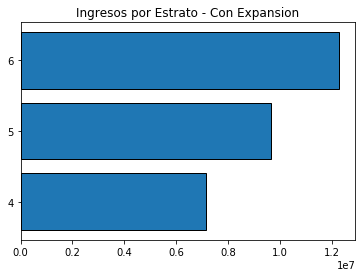

In [25]:
plt.barh(range(3), Ingresos_estratos['INGRESOS_HOG_EXP'], edgecolor='black')
plt.yticks(range(3), Ingresos_estratos['ESTRATO_VIV'], rotation=0)
plt.title("Ingresos por Estrato - Con Expansion")
plt.show()

#A continuacion, se realizaran unos estadisticos basicos a las variables Ingresos e Ingresos per Capita

In [26]:
db_bog_estratos['INGRESOS_HOG'].describe().round(1)
db_bog_estratos['INGRESOS_PER_CAPITA'].describe().round(1)

count       15965.0
mean      3573890.8
std       3448921.6
min             0.0
25%       1500000.0
50%       2690000.0
75%       4500000.0
max      57733332.0
Name: INGRESOS_PER_CAPITA, dtype: float64

#ANALISIS DE LOS ESTADISTICOS BASICOS

In [27]:
#Con estos estadisticos basicos, se pudo observar que el valor minimo era de 0, asi que se decide filtrar por este valor.
db_bog_estratos_sin_ingreso =db_bog_estratos.query('INGRESOS_HOG == 0')
db_bog_estratos_LP =db_bog_estratos.query('HOGAR_LP == 1')
db_bog_estratos_sin_ingreso.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
73,101073,43.673828,1010731,10107311,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2
133,101133,12.952162,1011331,10113311,6.79,6.11,7.14,6.62,6.99,6.67,...,54.Quinta Paredes,1100154,10.361760,1,4.0,1,2,2,2,2
359,101490,5.180880,1014901,10149011,6.79,6.11,7.14,6.62,6.99,6.67,...,54.Quinta Paredes,1100154,10.361760,1,4.0,1,2,2,2,2
365,101497,8.572169,1014971,10149711,6.79,6.11,7.14,6.62,6.99,6.67,...,54.Quinta Paredes,1100154,10.361760,1,4.0,1,2,2,2,2


In [28]:
db_bog_estratos_LP['INGRESOS_HOG'].describe().round(1)
db_bog_estratos_LP['INGRESOS_PER_CAPITA'].describe().round(1)

count       642.0
mean      35303.7
std       73333.2
min           0.0
25%           0.0
50%           0.0
75%           0.0
max      266666.7
Name: INGRESOS_PER_CAPITA, dtype: float64

#Luego de realizar estos filtros vemos que estas dos bases de datos pueden llegar a portar conclusiones interesantes y seran apartir de este momento objeto de estudio.

In [29]:
#Sacando los ingresos iguales a 0
db_bog_estratos_con_ingreso =db_bog_estratos.query('INGRESOS_HOG > 1500000')

#Filtrando bases por estrato

In [30]:
db_bog_estrato_4 =db_bog_estratos_con_ingreso.query('ESTRATO_VIV == 4')
db_bog_estrato_4.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
20,101019,60.925008,1010191,10101911,4.33,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
23,101023,21.122395,1010231,10102311,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
25,101025,7.827822,1010251,10102511,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
33,101033,67.669041,1010331,10103311,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
36,101036,23.097512,1010361,10103611,3.18,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [31]:
db_bog_estrato_5 =db_bog_estratos_con_ingreso.query('ESTRATO_VIV == 5')
db_bog_estrato_5.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
78,101078,79.168978,1010781,10107811,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,5.0,1,2,2,2,2
311,101415,29.336705,1014151,10141511,6.79,6.11,7.14,6.62,6.99,6.67,...,52.Niza,1100152,45.416667,1,5.0,1,2,2,2,2
312,101416,35.035971,1014161,10141611,3.18,6.11,7.14,6.62,6.99,6.67,...,52.Niza,1100152,45.416667,1,5.0,1,2,2,2,1
313,101417,29.336705,1014171,10141711,6.79,6.11,7.14,6.62,6.99,6.67,...,52.Niza,1100152,45.416667,1,5.0,1,2,2,2,2
314,101418,44.972619,1014181,10141811,6.79,2.29,7.14,6.62,6.99,6.67,...,52.Niza,1100152,45.416667,1,5.0,1,2,2,2,2


In [32]:
db_bog_estrato_6 =db_bog_estratos_con_ingreso.query('ESTRATO_VIV == 6')
db_bog_estrato_6.head() 

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
5,101005,33.398706,1010051,10100511,6.79,6.11,7.14,6.62,6.99,6.67,...,90. CHAPINERO: Chico Lago + Refugio,1100190,44.953095,1,6.0,1,2,2,2,2
71,101071,43.673828,1010711,10107111,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2
72,101072,43.673828,1010721,10107211,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2
74,101074,34.303933,1010741,10107411,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2
75,101075,77.914033,1010751,10107511,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2


In [33]:
#Analizando Estrato 4
db_bog_estrato_4['INGRESOS_HOG'].describe().round(1)
db_bog_estrato_4['INGRESOS_PER_CAPITA'].describe().round(1)

count       10904.0
mean      3511043.2
std       2928634.6
min        303750.0
25%       1712500.0
50%       2750000.0
75%       4380555.6
max      54529900.0
Name: INGRESOS_PER_CAPITA, dtype: float64

In [34]:
#Analizando Estrato 5
db_bog_estrato_5['INGRESOS_HOG'].describe().round(1)
db_bog_estrato_5['INGRESOS_PER_CAPITA'].describe().round(1)

count        2314.0
mean      4737444.9
std       3860339.4
min        395833.3
25%       2358736.1
50%       3750000.0
75%       5800000.0
max      50000000.0
Name: INGRESOS_PER_CAPITA, dtype: float64

In [35]:
#Analizando Estrato 6
db_bog_estrato_6['INGRESOS_HOG'].describe().round(1)
db_bog_estrato_6['INGRESOS_PER_CAPITA'].describe().round(1)

count        1021.0
mean      6719732.5
std       5636476.4
min        271666.7
25%       3000000.0
50%       5000000.0
75%       8500000.0
max      57733332.0
Name: INGRESOS_PER_CAPITA, dtype: float64

In [36]:
#Sacando los ingresos Percentil1 estrato 4
db_bog_estratos_con_ingreso_p1 =db_bog_estratos.query('INGRESOS_HOG <  1712500')
db_bog_estratos_con_ingreso_p1.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [37]:
#Sacando los ingresos Percentil 2 estrato 4
db_bog_estratos_con_ingreso_p2 =db_bog_estratos.query('INGRESOS_HOG <  2750000')
db_bog_estratos_con_ingreso_p2.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [38]:
#Sacando los ingresos Percentil 3 estrato 4
db_bog_estratos_con_ingreso_p3 =db_bog_estratos.query('INGRESOS_HOG <  4380555')
db_bog_estratos_con_ingreso_p3.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [39]:
db_bog_estrato_4_p1 =db_bog_estratos_con_ingreso_p1.query('ESTRATO_VIV == 4')
db_bog_estrato_4_p1.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
133,101133,12.952162,1011331,10113311,6.79,6.11,7.14,6.62,6.99,6.67,...,54.Quinta Paredes,1100154,10.361760,1,4.0,1,2,2,2,2


In [40]:
#Sacando los ingresos Percentil estrato 5
db_bog_estratos_con_ingreso_p1_5 =db_bog_estratos.query('INGRESOS_HOG <  2358736')
db_bog_estratos_con_ingreso_p1_5.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [41]:
#Sacando los ingresos Percentil 2 estrato 5
db_bog_estratos_con_ingreso_p2_5 =db_bog_estratos.query('INGRESOS_HOG <  3750000')
db_bog_estratos_con_ingreso_p2_5.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [42]:
#Sacando los ingresos Percentil 3 estrato 5
db_bog_estratos_con_ingreso_p3_5 =db_bog_estratos.query('INGRESOS_HOG <  5800000')
db_bog_estratos_con_ingreso_p3_5.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [43]:
#Filtrando bases por estrato 5 percentil 
db_bog_estrato_5_p1 =db_bog_estratos_con_ingreso_p1.query('ESTRATO_VIV == 5')
db_bog_estrato_5_p2 =db_bog_estratos_con_ingreso_p2.query('ESTRATO_VIV == 5')
db_bog_estrato_5_p3 =db_bog_estratos_con_ingreso_p3.query('ESTRATO_VIV == 5')
db_bog_estrato_5_p3.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
313,101417,29.336705,1014171,10141711,6.79,6.11,7.14,6.62,6.99,6.67,...,52.Niza,1100152,45.416667,1,5.0,1,2,2,2,2
1209,102570,24.923503,1025701,10257011,6.79,6.11,7.14,6.62,6.99,6.67,...,15.Ciudad Salitre Occidental,1100115,24.466657,1,5.0,1,2,2,2,2
1213,102574,18.607982,1025741,10257411,6.79,6.11,7.14,6.62,6.99,6.67,...,15.Ciudad Salitre Occidental,1100115,24.466657,1,5.0,1,2,2,2,2
1215,102576,24.923503,1025761,10257611,6.79,6.11,7.14,6.62,6.99,6.67,...,15.Ciudad Salitre Occidental,1100115,24.466657,1,5.0,1,2,2,1,2
1277,102638,43.037828,1026381,10263811,6.79,6.11,7.14,6.62,6.99,6.67,...,44.Los Cedros,1100144,41.192400,1,5.0,1,2,2,2,2


In [44]:
#Sacando los ingresos Percentil 1 estrato 6
db_bog_estratos_con_ingreso_p1_6 =db_bog_estratos.query('INGRESOS_HOG <  3000000')
db_bog_estratos_con_ingreso_p1_6.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [45]:
#Sacando los ingresos Percentil 2 estrato 6
db_bog_estratos_con_ingreso_p2_6 =db_bog_estratos.query('INGRESOS_HOG <  5000000')
db_bog_estratos_con_ingreso_p2_6.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
34,101034,55.970365,1010341,10103411,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2
35,101035,28.751731,1010351,10103511,6.79,6.11,7.14,6.62,6.99,6.67,...,21.El Prado,1100121,46.195024,1,4.0,1,2,2,2,2


In [46]:
#Sacando los ingresos Percentil 3 estrato 6
db_bog_estratos_con_ingreso_p3_6 =db_bog_estratos.query('INGRESOS_HOG <  8500000')
db_bog_estratos_con_ingreso_p3_6 .head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
5,101005,33.398706,1010051,10100511,6.79,6.11,7.14,6.62,6.99,6.67,...,90. CHAPINERO: Chico Lago + Refugio,1100190,44.953095,1,6.0,1,2,2,2,2
22,101022,20.413564,1010221,10102211,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
23,101023,21.122395,1010231,10102311,6.79,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2
24,101024,16.604442,1010241,10102411,4.33,6.11,7.14,6.62,6.99,6.67,...,12.Casa Blanca Suba,1100112,15.655643,1,4.0,1,2,2,2,2


In [47]:
#Filtrando bases por estrato 6 percentil 
db_bog_estrato_6_p1 =db_bog_estratos_con_ingreso_p1.query('ESTRATO_VIV == 6')
db_bog_estrato_6_p2 =db_bog_estratos_con_ingreso_p2.query('ESTRATO_VIV == 6')
db_bog_estrato_6_p3 =db_bog_estratos_con_ingreso_p3.query('ESTRATO_VIV == 6')

In [48]:
db_bog_estrato_6_p3.head()

,DIRECTORIO,FEX_C,DIRECTORIO_HOG,DIRECTORIO_PER,PUNTAJE_PISOS,PUNTAJE_PAREDES,PUNTAJE_SANITARIO,PUNTAJE_BASURAS,PUNTAJE_AGUA,PUNTAJE_COMBUSTIBLE,...,ESTRATO_TEX,ESTRATO,FEX_P,NVCBP11A,NVCBP11AA,NVCBP11C,NVCBP14B,NVCBP14E,NVCBP14G,NVCBP14I
4,101004,67.930390,1010041,10100411,6.79,6.11,7.14,6.62,6.99,0.00,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,1
72,101072,43.673828,1010721,10107211,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2
73,101073,43.673828,1010731,10107311,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,2,2,2,2
76,101076,43.673828,1010761,10107611,6.79,6.11,7.14,6.62,6.99,6.67,...,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,1100176,68.607867,1,6.0,1,1,2,2,2
6194,110756,28.814495,1107561,11075611,6.79,6.11,7.14,6.62,6.99,6.67,...,52.Niza,1100152,45.416667,1,6.0,1,2,2,2,2


La Economía a nivel nacional puede variar en gran manera, debido a que la calidad de Vida es diferente, por tal motivo este proyecto se enfoca en la Ciudad de Bogotá específicamente la zona rural, según el Dane los estándares para la ciudad Capital fue que si un hogar esta constituido por 4 personas se declaran como pobres si se encuentra por debajo del siguiente valor $1.029.732.

Se realizan estadísticos básicos a las variables de ingresos general per cápita donde se evidencia que el Mínimo es de $0, La media de estos valores corresponde a $3.573.890 y el máximo valor registrado es de un valor $ 57.733.332.

Posteriormente se filtra por los estratos medio Altos donde se observa por código upz, Estrato, Estrato_Tex.


Se determina que para el estrato 4 esta distribuido con el siguiente porcentaje en las localidades más destacadas:
•	Teusaquillo con 17.3%
•	Usaquén con 13.2%
•	Kennedy con 12.7%
•	Antonio Nariño con 9.8% 
•	Engativá con 7.6%.


Para el estrato 5 está distribuido con el siguiente porcentaje en las localidades más destacadas encontramos:

•	Suba con 36.2% 
•	Usaquén con 26.6%. 

Para el estrato 6 las localidades mas destacadas los son Usaquén y Chapinero


Determinado los estratos, se realiza un filtro para poder extraer y analizar las descripciones estadísticas principales.

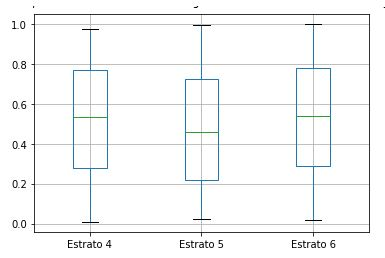

Para el estrato 4 tenemos que la Media esta en el valor $ 3.263.763 y su primer percentil se encuentra en el valor de $1.500.000, percentil secundario $2.500.000 y su tercer percentil corresponde a $4.125.000

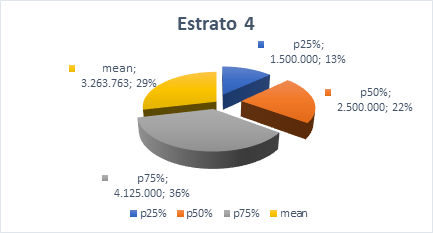

Para el estrato 5 tenemos que la Media está en el valor $4.547.337 y su primer percentil se encuentra en el valor de $2.141.739, percentil secundario $3.565.000 y su tercer percentil corresponde a $5.650.000.

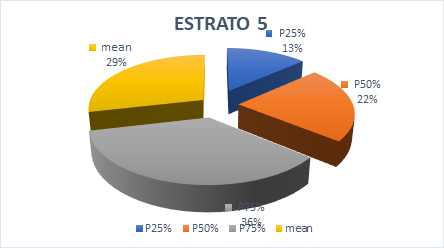

Para el estrato 6 tenemos que la Media está en el valor $6.454.758 y su primer percentil se encuentra en el valor de $2.718.750, percentil secundario $4.930.000 y su tercer percentil corresponde a $8.324.000.

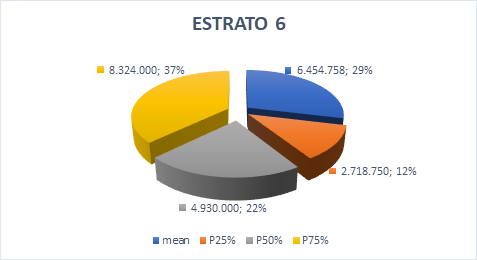